# Визуализация

## Введение

Никакой анализ данных не обходится без визуализации. 

В `python` основная библиотека для этих целей - `matplotlib`. Над ней есть некоторая надстройка - `seaborn`. Это библиотека с синтаксисом попроще, позволяющая тем не менее рисовать более симпатичные графики. Ну, и наконец встроенные в саму `pandas` методы позволяют, не выходя из `dataframe`, построить гистограмму или [scatter-plot](https://en.wikipedia.org/wiki/Scatter_plot).

Давайте посмотрим, как это работает.

## Практические кейсы

Во-первых, импортируем уже привычные нам библиотеки.

In [10]:
import pandas as pd
import numpy as np

А теперь импортируем упоминаемые в самом начале библиотеки для визуализации данных.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Надстройка `%matplotlib inline` сообщает Jupyter, что мы хотим получать результаты визуализаций прямо здесь, т.е. внутри файла.

In [12]:
students_perfomance = pd.read_csv('StudentsPerformance.csv')

In [17]:
students_perfomance = students_perfomance.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
})

In [18]:
students_perfomance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Построение гистрограммы

Построим гистограмму интересующего нас распределения по переменной `math score`.

Вызовем встроенный в `pandas` метод `hist()`.

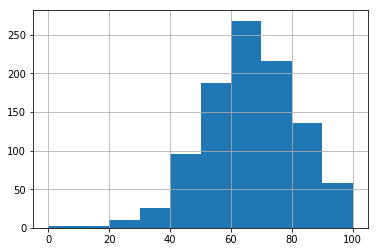

In [19]:
students_perfomance.math_score.hist()

У `pandas` довольно богатый набор [методов для визуализации](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). 

Он довольно базовый, однако для какого-то обзорного этапа - просто посмотреть как распределены переменные, как они между собой коррелируют, есть или нет необычные формы распределения - более чем подходят.

Важно понимать, что `pandas` - это, всё-таки, не библиотека для визуализации и hist() - это функция из библиотеки matplotlib. Просто мы довольно неплохо интегрируем pandas и matplotlib между собой. 

Мы могли бы честно написать небольшой скрипт для написания гистограммы средствами библиотеки matplotlib, однако из pandas сделать это чуть-чуть проще.

Можно вызвать нужную нам переменную и сначала для неё среднее значение посчитать, а следующей командой построить гистограмму.

In [21]:
students_perfomance.math_score.mean()

66.089

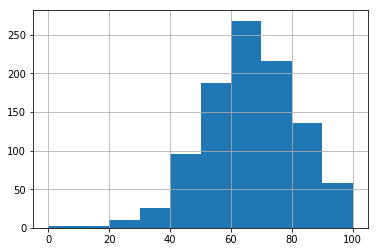

In [22]:
students_perfomance.math_score.hist()

Что действительно очень круто и удобно при работе с данными в pandas.

## Построение scatter-plot

Гистограмма построена - пол-дела сделано. Давайте теперь построим scatter-plot.

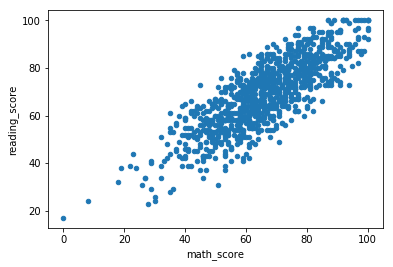

In [25]:
students_perfomance.plot.scatter(x='math_score', y='reading_score')

Мы получили график корреляции между двумя нашими переменными. Видим, что это довольно линейная приятная глазу взаимосвязь. 

Из строки перед графиком видно, что мы на самом деле опять используем библиотеку matplotlib.

Такой подход хорош и удобен если мы хотим быстро поисследовать наши данные, получить интересующие нас зависимости сразу же. Однако для кастомизации графика (изменение цвета, подпись осей, добавление легенды), то тут лучше использовать библиотеку seaborn.

Давайте построим график scatter-plot в библиотеке [seaborn](http://seaborn.pydata.org/).

C:\Users\kes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


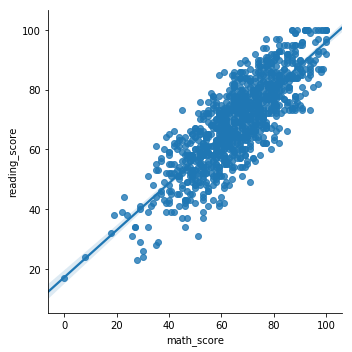

In [29]:
sns.lmplot(x='math_score', y='reading_score', data=students_perfomance)

Можно добавить на наш график группирующую переменную, например gender, и тогда мы покрасим наши точки в зависимости от значения переменной gender; добавим легенду на график и внутри каждй из групп добавим регресионную прямую. 

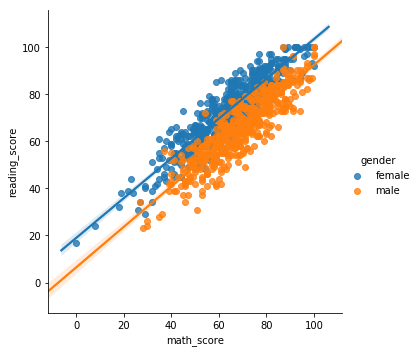

In [30]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_perfomance)

А если мы хотим убрать регрессионную прямую с графика, то задаём аргумент fit_reg=False.

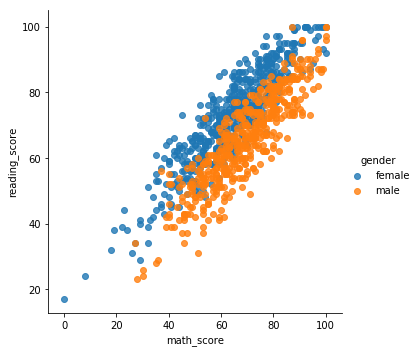

In [31]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_perfomance, fit_reg=False)

График можно кастомизировать, добавить ему читаемости.

В частности, сейчас названия осей просто дублируют названия переменных. Давайте изменим названия осей.

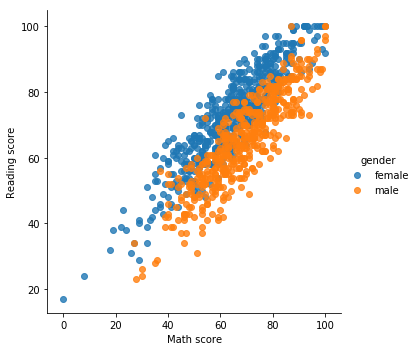

In [34]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_perfomance, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')